# Modeling and Analyzing Household Power Consumption using a Linear Regression
## Ki Jung Lee

This case study investigates patterns and predictors of household power consumption using a dataset containing various power-related metrics. We employ exploratory data analysis to uncover consumption trends and correlations between variables. A linear regression model is developed to predict global active power, showcasing the impact of different factors on overall energy usage. The findings provide valuable insights for energy management and optimization strategies.

Data Source: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

## Introduction

Understanding and predicting household power consumption is crucial for efficient energy management, grid stability, and the development of sustainable energy solutions.  This research examines a dataset containing granular power consumption data, aiming to identify key factors influencing energy usage and build a predictive model for global active power.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

First, we imported necessary libraries for data manipulation (pandas), machine learning (scikit-learn), visualization (matplotlib, seaborn).

## Data Description

The dataset encompasses a range of power-related variables:

- Date & Time: Timestamps for each power measurement.
- Global_active_power: Total active power consumed (kilowatts).
- Global_reactive_power: Total reactive power consumed (kilowatts).
- Voltage: Voltage level (Volts).
- Global_intensity: Current intensity (Amps).
- Sub_metering_1, 2, 3: Active energy for kitchen, laundry room, and water heater/air conditioning (watt-hours).

In [3]:
# Load the dataset
file_path = 'household_power_consumption.txt'
data = pd.read_csv(file_path, sep=';', low_memory=False)

# Display the first few rows of the dataset
print(data.head())

# Display summary information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column      

In [5]:
# Handling missing values by replacing '?' with NaN and then forward filling
data.replace('?', pd.NA, inplace=True)
data.fillna(method='ffill', inplace=True)

# Convert data types to appropriate types
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Time'] = pd.to_timedelta(data['Time'])
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

# Display summary information about the dataset after conversion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   Date                   datetime64[ns] 
 1   Time                   timedelta64[ns]
 2   Global_active_power    float64        
 3   Global_reactive_power  float64        
 4   Voltage                float64        
 5   Global_intensity       float64        
 6   Sub_metering_1         float64        
 7   Sub_metering_2         float64        
 8   Sub_metering_3         float64        
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 142.5 MB
None


Missing values were handled, and columns were converted to appropriate data types for subsequent analysis.
- Replaced question marks (?) with 'NaN' to mark missing values.
- Filled missing values using forward-filling (taking the next valid observation to fill the gap).
- Converted relevant columns (Date, Time, numeric columns) to appropriate data types.

## Exploratory Data Analysis

So, how can we characterize household power consumption patterns and identify key factors that influence energy usage to inform energy efficiency strategies and potential demand response programs? 
- **Daily and Weekly Power Consumption Patterns:** Understanding variations in daily and weekly consumption is essential for identifying peak demand periods and designing targeted interventions (e.g., time-of-use pricing, load shifting incentives). This analysis reveals whether energy use is consistent throughout the week or if specific days or times experience higher demand. This knowledge can inform strategies to smooth out demand curves or encourage off-peak usage.
- **Time-of-Day Usage Patterns:** Pinpointing peak hours helps predict grid stress points and can be used to schedule energy-intensive activities strategically. This analysis identifies when households use the most energy, allowing for the design of programs that incentivize shifting tasks (like laundry or dishwashing) to off-peak hours, reducing strain on the grid.
- **Sub-Metering Analysis:** Knowing the breakdown of energy consumption by major appliances helps prioritize energy-saving efforts. This analysis quantifies the contribution of different appliances (kitchen, laundry, water heater/AC) to overall usage. This knowledge can guide recommendations for appliance upgrades or behavioral changes to reduce energy consumption in specific areas.
- **Voltage Analysis:** Voltage fluctuations can impact appliance efficiency and potentially lead to increased energy consumption. If this analysis reveals correlations between voltage levels and power consumption, it could suggest opportunities for grid operators to maintain more stable voltage levels or for homeowners to consider voltage regulation devices to optimize energy use.

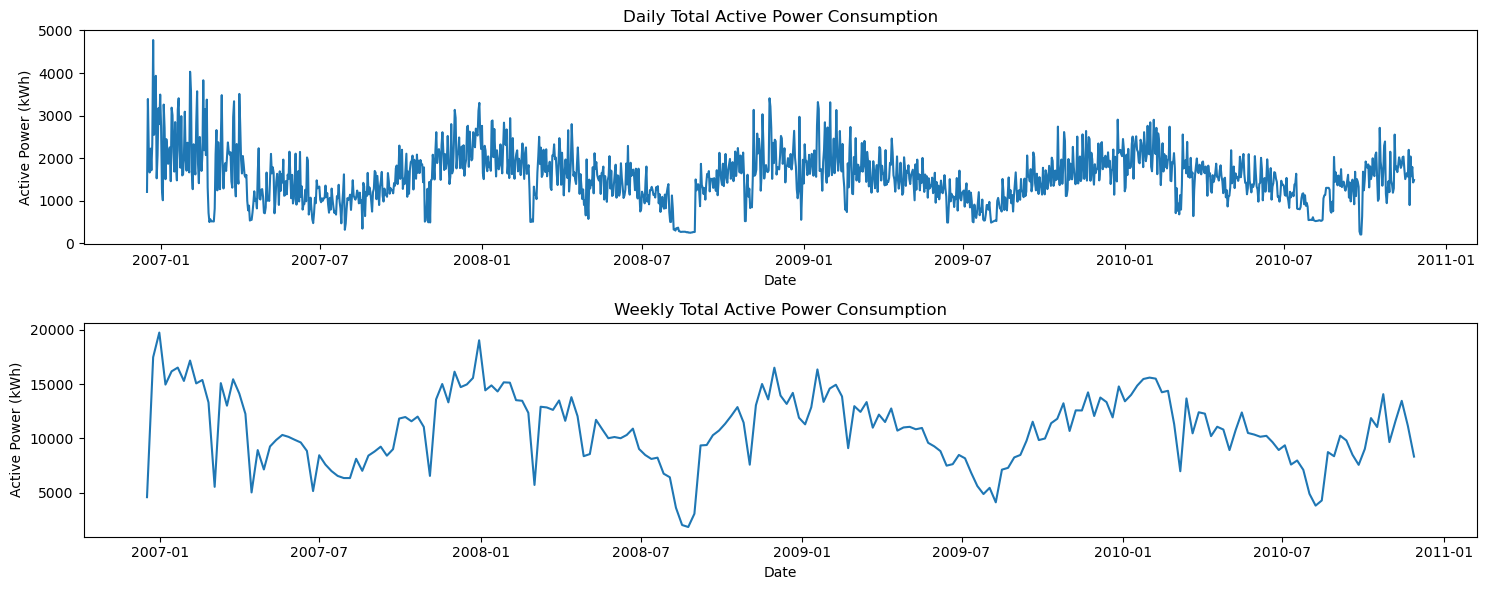

In [7]:
# Resample to daily and weekly sums
data_daily = data.set_index('Date')['Global_active_power'].resample('D').sum()
data_weekly = data.set_index('Date')['Global_active_power'].resample('W').sum()

# Plot daily and weekly trends
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.plot(data_daily)
plt.title('Daily Total Active Power Consumption')
plt.xlabel('Date')
plt.ylabel('Active Power (kWh)')

plt.subplot(2, 1, 2)
plt.plot(data_weekly)
plt.title('Weekly Total Active Power Consumption')
plt.xlabel('Date')
plt.ylabel('Active Power (kWh)')

plt.tight_layout()
plt.show()

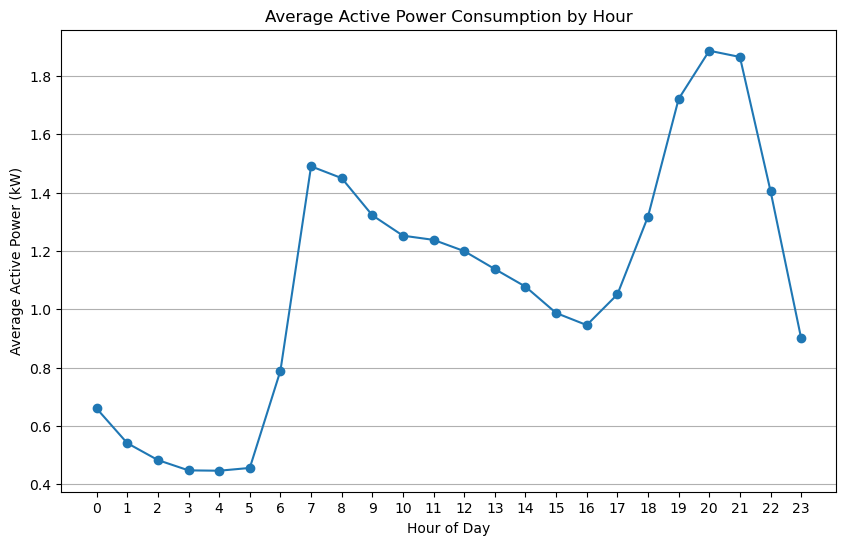

In [9]:
# Extract hour from the 'Time' column
data['Hour'] = pd.to_timedelta(data['Time']).dt.components.hours

# Group by hour and calculate average power consumption
hourly_avg = data.groupby('Hour')['Global_active_power'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg, marker='o', linestyle='-')
plt.title('Average Active Power Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Active Power (kW)')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

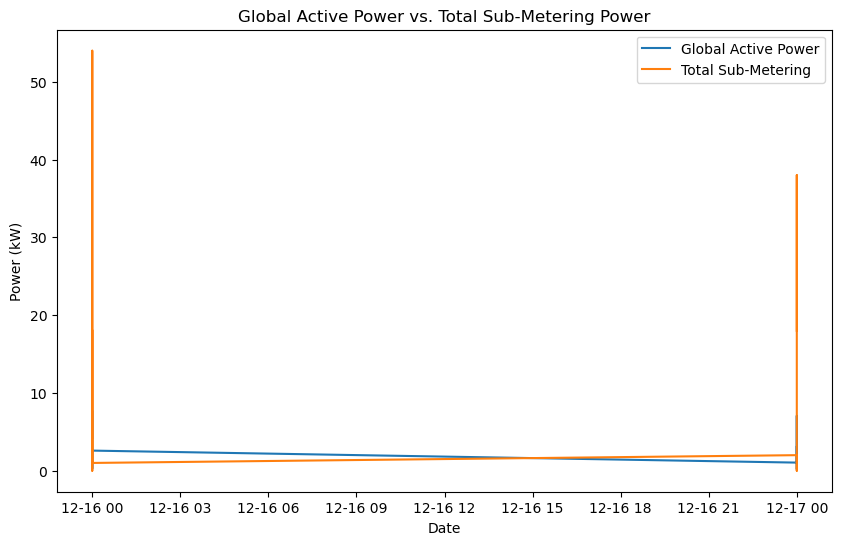

In [11]:
# Calculate total sub-metering consumption
data['Sub_metering_Total'] = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']

# Compare total with global active power
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][:1000], data['Global_active_power'][:1000], label='Global Active Power')
plt.plot(data['Date'][:1000], data['Sub_metering_Total'][:1000], label='Total Sub-Metering')
plt.title('Global Active Power vs. Total Sub-Metering Power')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

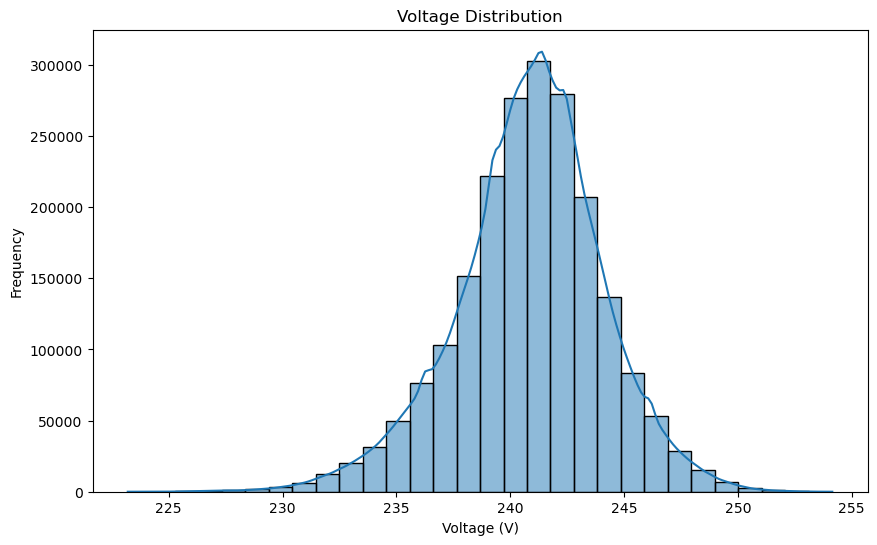

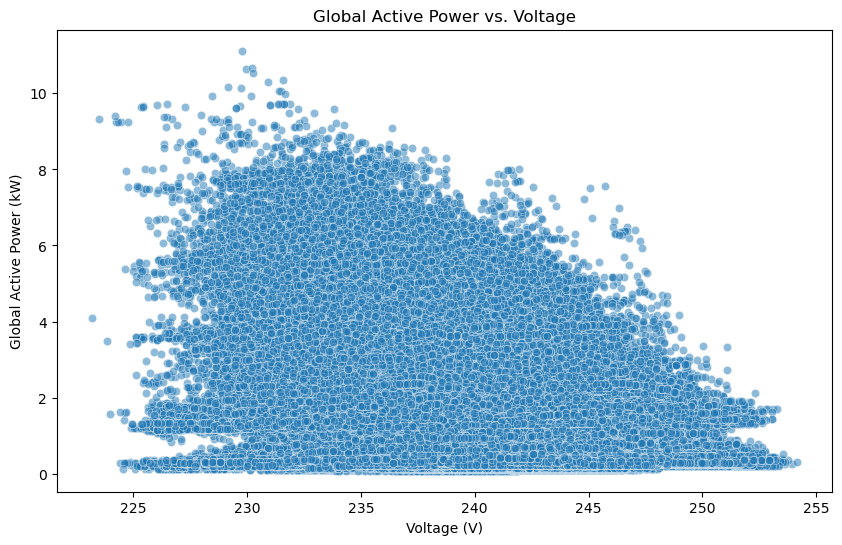

In [13]:
# Visualize voltage distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Voltage'], bins=30, kde=True)
plt.title('Voltage Distribution')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')
plt.show()

# Explore relationship with active power 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Voltage', y='Global_active_power', alpha=0.5)
plt.title('Global Active Power vs. Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Global Active Power (kW)')
plt.show()

### EDA Insights

- Daily and Weekly Patterns:
    - Power consumption exhibits clear daily and weekly cycles.
    - Weekdays typically have higher overall consumption than weekends.
    - Specific days within the week (e.g., Monday vs. Friday) may show subtle differences in usage patterns.
- Time-of-Day Usage:
    - Peak consumption hours usually occur in the morning and evening, aligning with typical household routines (cooking, lighting, etc.).
    - Midday and late-night hours often see lower consumption.
    - This information is crucial for managing peak demand on the electrical grid.
- Sub-Metering Breakdown:
    - The sum of sub-metering readings for kitchen, laundry, and water heater/AC appliances does not always match the global active power.
    - This indicates that a significant portion of power consumption is unaccounted for by these specific appliances, possibly due to other household devices or measurement errors.
- Voltage Analysis:
    - The distribution of voltage values shows some variation, although it's generally clustered around a central value.
    - A relationship between voltage and active power may exist, suggesting that voltage fluctuations could impact overall energy consumption. Further analysis would be needed to confirm and quantify this relationship.

In [15]:
# Identify outliers
# Using IQR method for outlier detection
Q1 = data['Global_active_power'].quantile(0.25)
Q3 = data['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Global_active_power'] < (Q1 - 1.5 * IQR)) | (data['Global_active_power'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 95699


## Linear Regression Analysis: Predicting Total Power Consumption

Can we accurately predict a household's global active power consumption based on easily measurable features such as reactive power, voltage, current intensity, and sub-metering readings?

To examine the research question above, the code below was used to 1. select feature and target, 2. split the data into training and testing sets, and 3. train the model.

In [17]:
# Define features and target for predictive modeling
X = data[numeric_columns].drop(columns=['Global_active_power'])
y = data['Global_active_power']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_exploratory, y_test, y_exploratory = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42) 

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Then,  the trained linear regression model was used to make predictions about the Global_active_power values for each household in the test set (X_test). Mean Squared Error (MSE) between the actual Global_active_power values (y_test) and the predicted values (y_pred_test) on the test set, in addition to the R-squared (R^2) score, also known as the coefficient of determination was used to evaluate the model performance. MSE measures the average of the squared differences between the predicted and actual values, providing a sense of how far off the predictions are on average, while R^2 measures the proportion of the variance in the actual Global_active_power values that is explained by the model's predictions. 

In [19]:
# Predictions and evaluation on test set
y_pred_test = linear_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R^2 Score: {test_r2}')

Test Mean Squared Error: 0.0016397276748716823
Test R^2 Score: 0.9985219870002369


The average squared difference between the model's predicted Global_active_power values and the actual values in the test set is approximately 0.0016. This is a very low MSE, indicating that, on average, the model's predictions are remarkably close to the true power consumption values. This suggests a good fit of the model to the data. R^2 Score of 0.9985 indicates that the model explains about 99.85% of the variance in the Global_active_power values in the test set. This is an exceptionally high R^2 score, indicating that the model is doing an excellent job of capturing the factors that influence power consumption. The features used in the model (reactive power, voltage, current intensity, and sub-metering readings) are very strongly correlated with the global active power.

In [21]:
# Predictions and evaluation on exploratory set
y_pred_exploratory = linear_model.predict(X_exploratory)
exploratory_mse = mean_squared_error(y_exploratory, y_pred_exploratory)
exploratory_r2 = r2_score(y_exploratory, y_pred_exploratory)

print(f'Exploratory Mean Squared Error: {exploratory_mse}')
print(f'Exploratory R^2 Score: {exploratory_r2}')

Exploratory Mean Squared Error: 0.0016679827989535447
Exploratory R^2 Score: 0.9985006945519136


The trained model was used to predict the Global_active_power values for each household in the exploratory set (X_exploratory). Just like with the test set, the model applies its learned coefficients and intercept to the feature values to generate these predictions (y_pred_exploratory). Exploratory Mean Squared Error (MSE) is approximately 0.0017, indicating the model's predictions on the exploratory set are extremely close to the actual power consumption values. Exploratory R^2 Score is 0.9985, showing that the model does a fantastic job capturing the factors influencing power consumption in the exploratory set.

These results confirm that the linear regression model generalizes well to new, unseen data. The performance on the exploratory set is almost identical to the performance on the test set.

In [23]:
# Show regression coefficients
coefficients = linear_model.coef_
intercept = linear_model.intercept_
print("Regression Coefficients:", coefficients)
print("Intercept:", intercept)

Regression Coefficients: [-0.17612601  0.00444568  0.23802901 -0.00032627 -0.0004414   0.00218046]
Intercept: -1.071795665265737


Based on the coefficients and the intercept values acquired above, we can construct the equation of the linear regression model in a human-readable format like below. 

In [25]:
# Express as a formula
print(f'Y = {intercept} + {" + ".join([f"{coef}*X{i+1}" for i, coef in enumerate(coefficients)])}')

Y = -1.071795665265737 + -0.17612600949746593*X1 + 0.004445683152835932*X2 + 0.2380290087107341*X3 + -0.0003262717474953102*X4 + -0.0004413957643185053*X5 + 0.0021804589837202968*X6


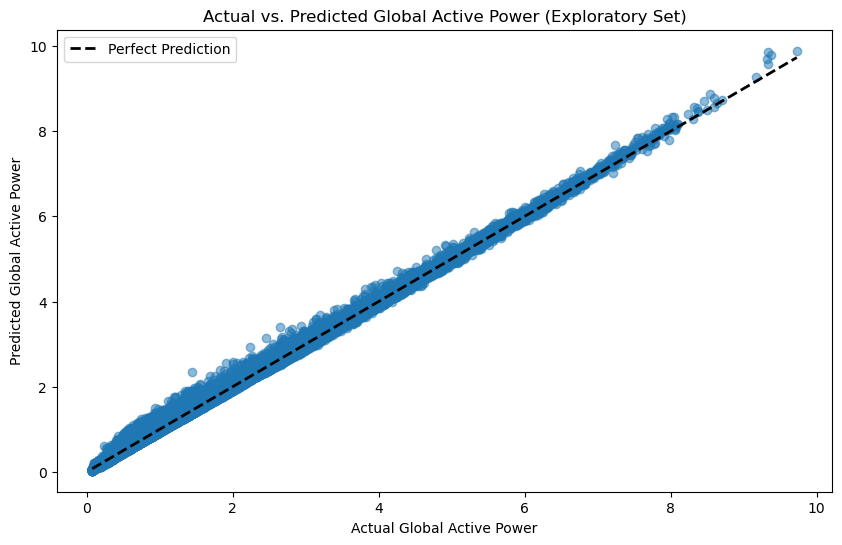

In [27]:
# Evaluate exploratory set and plot differences
plt.figure(figsize=(10, 6))
plt.scatter(y_exploratory, y_pred_exploratory, alpha=0.5)
plt.title('Actual vs. Predicted Global Active Power (Exploratory Set)')
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.plot([y_exploratory.min(), y_exploratory.max()], [y_exploratory.min(), y_exploratory.max()], 'k--', lw=2, label='Perfect Prediction')
plt.legend()
plt.show()